https://www.hashscraper.com/

- 해시스크래퍼에 가입하셔서 대시보드를 확인  
- 다양한 크롤링 봇들이 있음  
- 이는 개발지식이 없는 비전공자도 쉽고 빠르게 데이터를 수집할 수 있음.  
- 사이트마다 다양한 봇이 있기 때문에 필요하신 사이트를 검색하여 활용

In [1]:
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install wordcloud
'''

'\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n!pip install wordcloud\n'

In [2]:
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# header 만들기
url = 'https://www.melon.com/chart/index.htm'
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}

In [1]:
# 헤더 확인
res =req.get(url, headers=header)
res
#파이선 객체 데이터로 변환
html = bs(res.text,'lxml')
#html

NameError: ignored

In [6]:
rank_list = []
singer_list = []
song_list = []


rank = html.find_all('span', attrs={'class':'rank'})
singer = html.select('.ellipsis.rank02 > span > a')
song = html.select('.ellipsis.rank01 > span > a')

for r in rank:
  rank_list.append(r.text)

for s in singer:
  singer_list.append(s.text)

for sg in song:
  song_list.append(sg.text)

print(len(song_list))
top_100={'순위':rank_list[:100], '가수':singer_list[:100], '곡명':song_list}
top_100_df=pd.DataFrame(top_100)
top_100_df

100


,순위,가수,곡명
0,순위,EXO,첫 눈
1,1,LE SSERAFIM (르세라핌),Perfect Night
2,2,aespa,Drama
3,3,태연 (TAEYEON),To. X
4,4,Mariah Carey,All I Want for Christmas Is You
...,...,...,...
95,95,전건호,Yes or No
96,96,#안녕,Attention
97,97,김호중,나 홀로 집에 (Home Alone)
98,98,Charlie Puth,"모든 날, 모든 순간 (Every day, Every Moment)"


In [7]:
from wordcloud import WordCloud

text = top_100_df['곡명']

In [10]:
word_mask=np.array(Image.open('melon.png'))
#word_mask

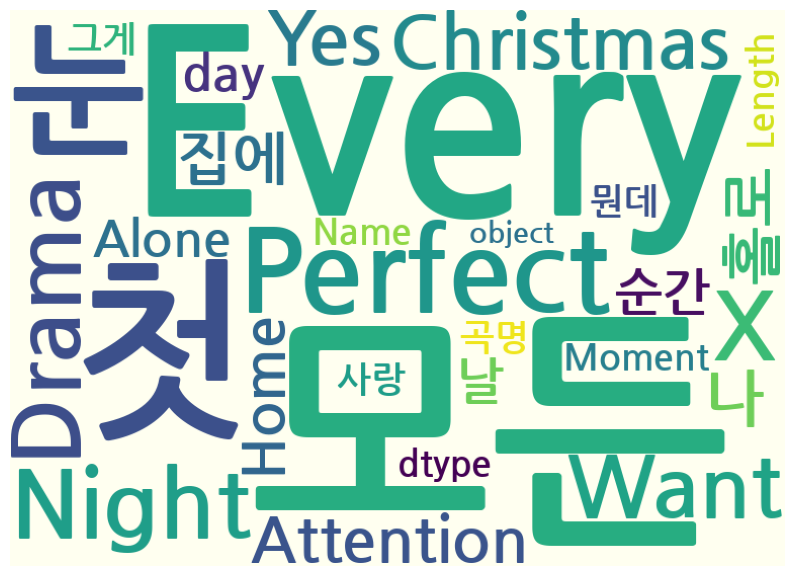

In [11]:
wordcloud=WordCloud(max_words=50,font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',mask=word_mask,background_color='ivory').generate(str(text))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [9]:
cd /content/drive/MyDrive/Colab Notebooks/SKT_FLY_AI_4th/Week_2/Day_6

/content/drive/MyDrive/Colab Notebooks/SKT_FLY_AI_4th/Week_2/Day_6


In [12]:
text = open('hangul_text.txt').read()

In [13]:
text

'감격했던 <b>상암 맛집</b> 리스트눈길가는 <b>상암 맛집</b> 리스트흡족했던 <b>상암 맛집</b> 리스트무한흡입 가능한 <b>상암 맛집</b>행복이 가득한 <b>상암 맛집</b> 모음집경이로운 <b>상암 맛집</b> 모음쫄깃했던 <b>상암 맛집</b>감탄이 절로 나오는 <b>상암 맛집</b>훌륭했던 <b>상암 맛집</b> 리스트29,000 코스요리 만족! <b>상암</b> 파스타<b>맛집</b> 인칸토 키친<b>상암 맛집</b> 후라토식당! 규카츠가 맛있는 집[디엠씨 <b>맛집</b>] <b>상암</b> 참치공방, 주차되고 분위기 좋은곳~~ ^^깔끔했던 <b>상암 맛집</b>[<b>상암</b>MBC] <b>상암</b>MBC<b>맛집</b>으로 넘모 유명한 신선한 김밥... <b>상암 맛집</b> 월화고기 - 돼지고기 여기가 최고<b>상암</b> 카페 추천 : 크로플 <b>맛집</b> 런이트 RUNIT 위치 메뉴 주차여전한 <b>상암 맛집</b><b>상암 맛집</b> - 시카노이에<b>상암 맛집</b> 소담 가성비 굿 소갈비 + 함흥냉면맛깔스러웠던 <b>상암 맛집</b>[상암/이베리코] <b>상암 맛집</b> 이베리코 먹을 “시간돼지”?<b>상암맛집</b> 아고야 (일본식 스테이크덮밥)<b>상암</b>mbc<b>맛집</b> 건강한 로봇김밥 그린삼겹살/목살이 생각날땐 <b>상암맛집</b> 월화고기로!<b>상암 맛집</b> :: 소담 냉면 갈비 존맛!디지털미디어시티역 밥집) 내돈내산 <b>상암 맛집</b> \'아고야... <b>상암 맛집</b> 자꾸 생각나 !<b>상암 맛집</b> 청진생대구탕[<b>상암맛집</b>]나만알고 싶은 오마카세맛집, 스시가효<b>상암</b> 고깃집 - 오소오소 <b>상암</b>점(가성비 <b>상암</b> 소고기 <b>맛집</b>)<b>상암 맛집</b> / 옥자회관, 크라이치즈버거입소문 난 <b>상암 맛집</b><b>상암 맛집</b> 구성이 좋은 참치회코스[<b>상암 맛집</b>]매력적인 평양냉면 입문기 / 상암 점심 맛집... 

In [14]:
word_mask=np.array(Image.open('fan.jpg'))
#word_mask

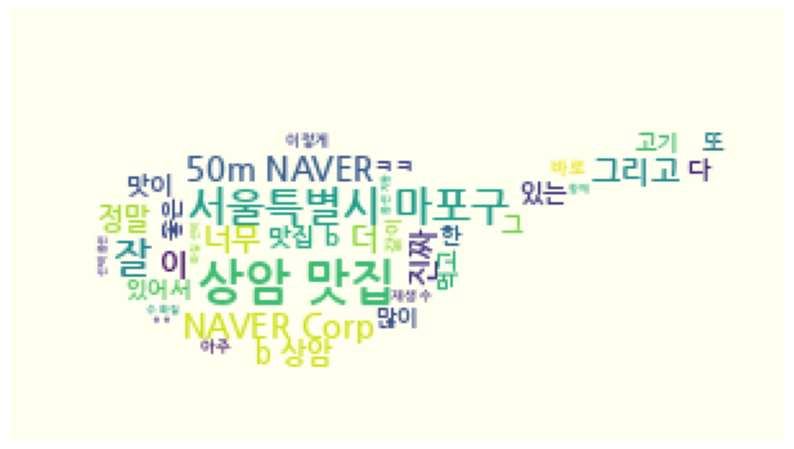

In [15]:
wordcloud=WordCloud(max_words=50,font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',mask=word_mask,background_color='ivory').generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
wordcloud = WordCloud().generate(text)
wordcloud
wordcloud.words_

{'상암 맛집': 1.0,
 '서울특별시 마포구': 0.6941747572815534,
 '잘': 0.6650485436893204,
 'NAVER Corp': 0.6601941747572816,
 '50m NAVER': 0.6504854368932039,
 '진짜': 0.5485436893203883,
 '그리고': 0.5242718446601942,
 '너무': 0.5145631067961165,
 '더': 0.48058252427184467,
 '이': 0.46601941747572817,
 'b 상암': 0.46116504854368934,
 '정말': 0.44660194174757284,
 '맛집 b': 0.441747572815534,
 '맛이': 0.4223300970873786,
 '다': 0.3932038834951456,
 '있는': 0.3883495145631068,
 '있어서': 0.38349514563106796,
 '좋은': 0.36893203883495146,
 '그': 0.3640776699029126,
 '한': 0.34951456310679613,
 '또': 0.33980582524271846,
 '많이': 0.33980582524271846,
 'ㅋㅋ': 0.32524271844660196,
 '고기': 0.32038834951456313,
 '먹고': 0.32038834951456313,
 '바로': 0.3155339805825243,
 '같이': 0.3106796116504854,
 '이렇게': 0.3106796116504854,
 '아주': 0.3106796116504854,
 '재생 수': 0.2912621359223301,
 '수 화질': 0.2912621359223301,
 '화질 선택': 0.2912621359223301,
 '선택 옵션': 0.2912621359223301,
 '옵션 자동': 0.2912621359223301,
 '함께': 0.2815533980582524,
 'ㅎㅎ': 0.276699029126

In [37]:
words_counts = wordcloud.words_

# 값(value)을 기준으로 딕셔너리를 정렬
sorted_dict = list(sorted(words_counts.items(), key=lambda item: item[1], reverse=True))[:10]

print(sorted_dict)

[('상암 맛집', 1.0), ('서울특별시 마포구', 0.6941747572815534), ('잘', 0.6650485436893204), ('NAVER Corp', 0.6601941747572816), ('50m NAVER', 0.6504854368932039), ('진짜', 0.5485436893203883), ('그리고', 0.5242718446601942), ('너무', 0.5145631067961165), ('더', 0.48058252427184467), ('이', 0.46601941747572817)]


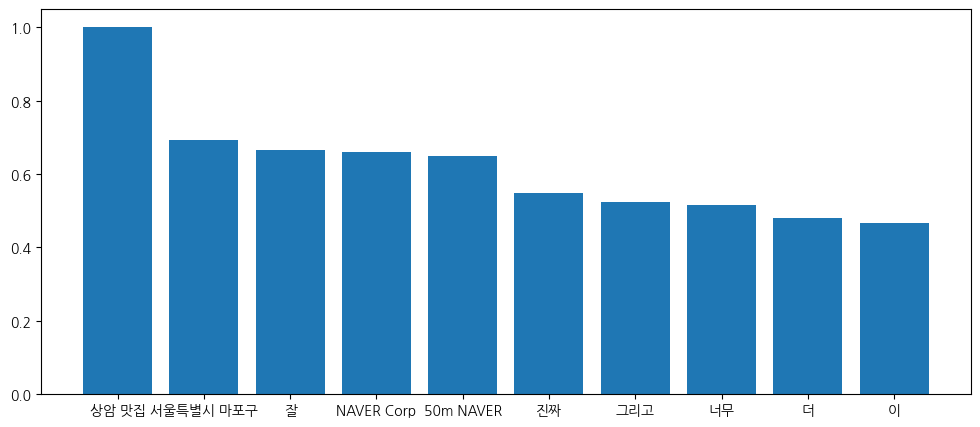

In [46]:
x_list = []
y_list = []

for i in sorted_dict:
  x_list.append(i[0])
  y_list.append(i[1])

plt.figure(figsize=(12,5))
plt.bar(x=x_list, height=y_list)
plt.show()

In [43]:
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
'''

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/